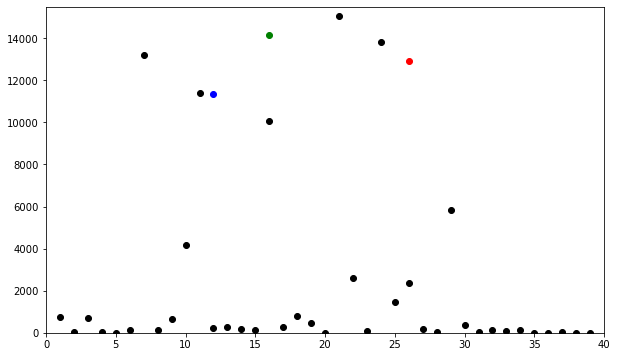

In [1]:
# Início

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    'y':[750, 41, 701, 18, 5, 135, 13190, 144, 677, 4154, 11399, 227, 287, 179, 150, 10077, 260, 800, 455, 2, 15052, 2612, 76, 13798, 1459, 2378, 179, 25, 5843, 376, 22, 114, 68, 114, 2, 10, 16, 12, 12
]
})

np.random.seed(200)
k = 3
# Centroids [i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 40), np.random.randint(0, 15500)]
    for i in range(k)
}

fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.ylim(0, 15500)
plt.show()

   x    y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  750     12155.025710     13398.008397     10593.005711        3     b
1  2   41     12864.022388     14107.006947     11302.004424        3     b
2  3  701     12204.021673     13447.006284     10642.003806        3     b
3  4   18     12887.018779     14130.005096     11325.002826        3     b
4  5    5     12900.017093     14143.004278     11338.002161        3     b


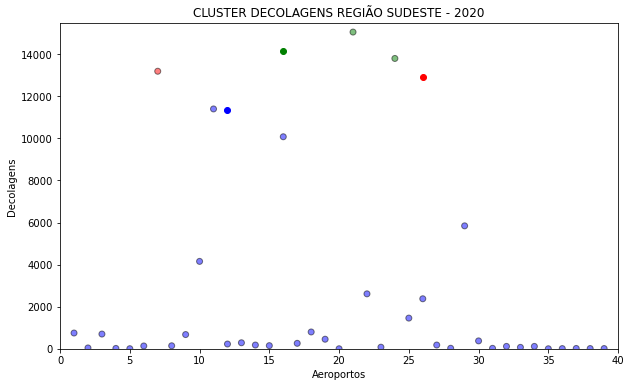

In [2]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print (df.head())

fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.ylim(0, 15500)

plt.xlabel("Aeroportos")
plt.ylabel("Decolagens")
plt.title("CLUSTER DECOLAGENS REGIÃO SUDESTE - 2020")

plt.show()


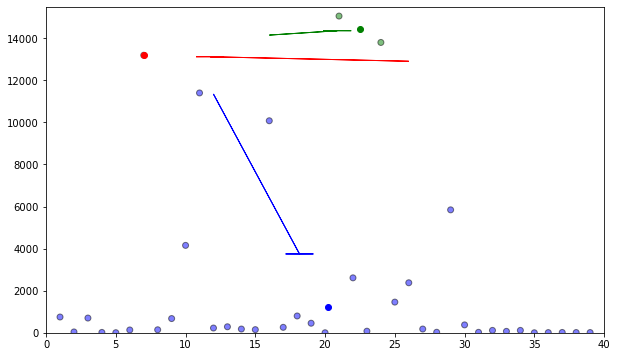

In [3]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.ylim(0, 15500)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

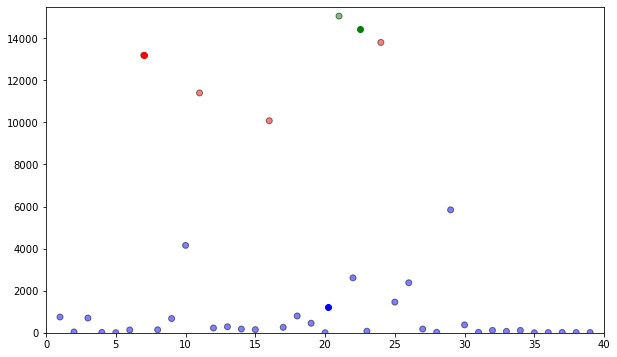

In [4]:
## Repeat Assignment Stage

df = assignment(df, centroids)

# Plot Results
fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.ylim(0, 15500)
plt.show()

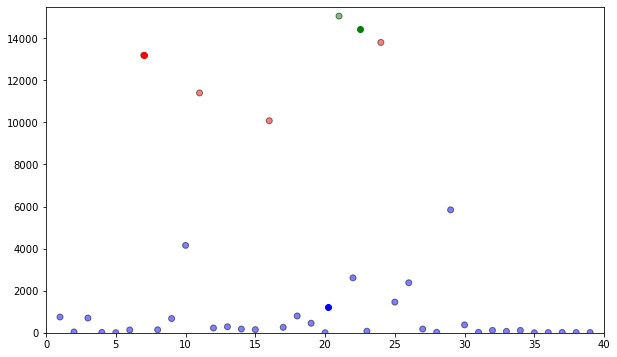

In [5]:
## Repeat Assignment Stage

df = assignment(df, centroids)

# Plot Results
fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.ylim(0, 15500)
plt.show()

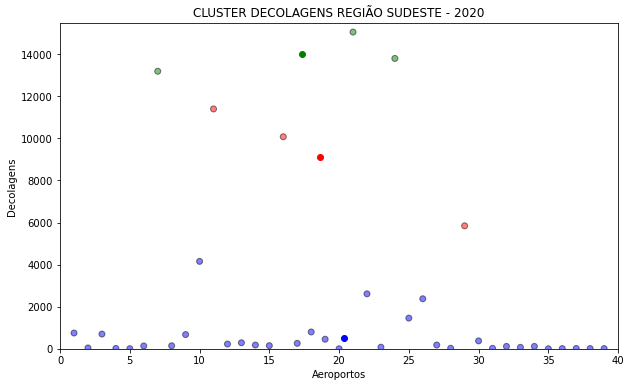

In [6]:
# Continue until all assigned categories don't change any more

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])


plt.xlabel("Aeroportos")
plt.ylabel("Decolagens")
plt.title("CLUSTER DECOLAGENS REGIÃO SUDESTE - 2020")
    
plt.xlim(0, 40)
plt.ylim(0, 15500)

plt.show()



In [7]:

df = pd.DataFrame({
 'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
    'y':[750, 41, 701, 18, 5, 135, 13190, 144, 677, 4154, 11399, 227, 287, 179, 150, 10077, 260, 800, 455, 2, 15052, 2612, 76, 13798, 1459, 2378, 179, 25, 5843, 376, 22, 114, 68, 114, 2, 10, 16, 12, 12]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


KMeans(n_clusters=3)

In [8]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_